In [3]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import yfinance as yf

In [5]:
meta = yf.Ticker("META")
for x in meta.info:
    print(x, ":", meta.info[x])

address1 : 1 Meta Way
city : Menlo Park
state : CA
zip : 94025
country : United States
phone : 650 543 4800
website : https://investor.fb.com
industry : Internet Content & Information
industryKey : internet-content-information
industryDisp : Internet Content & Information
sector : Communication Services
sectorKey : communication-services
sectorDisp : Communication Services
longBusinessSummary : Meta Platforms, Inc. engages in the development of products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality headsets, and wearables worldwide. It operates in two segments, Family of Apps and Reality Labs. The Family of Apps segment offers Facebook, which enables people to share, discuss, discover, and connect with interests; Instagram, a community for sharing photos, videos, and private messages, as well as feed, stories, reels, video, live, and shops; Messenger, a messaging application for people to connect with friends

In [6]:
meta.history

<bound method TickerBase.history of yfinance.Ticker object <META>>

In [12]:
mt = pd.DataFrame(meta.history(period="6mo"))
mt.head()
# mt.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-01 00:00:00-05:00,393.132155,399.678700,392.243965,393.970428,29727100,0.0,0.0
2024-02-02 00:00:00-05:00,458.657506,484.963435,452.081024,474.015930,84615500,0.0,0.0
2024-02-05 00:00:00-05:00,468.916395,470.932241,458.278252,458.467865,40832400,0.0,0.0
2024-02-06 00:00:00-05:00,463.048474,466.162071,452.071032,453.787506,21655200,0.0,0.0
2024-02-07 00:00:00-05:00,457.060756,470.553018,455.244481,468.626984,23066000,0.0,0.0


In [14]:
mt.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,125.000000,125.000000,125.000000,125.000000,1.250000e+02,125.00000,125.0
mean,485.995524,492.160305,479.742081,486.093988,1.612592e+07,0.00800,0.0
std,24.251483,23.837454,23.525097,23.351539,1.052190e+07,0.06299,0.0
min,393.132155,399.678700,392.243965,393.970428,6.005600e+06,0.00000,0.0
25%,469.880005,475.108281,465.134160,470.782562,1.098330e+07,0.00000,0.0
50%,488.524976,495.220001,482.271157,488.690002,1.306040e+07,0.00000,0.0
75%,502.501088,507.695950,496.010010,502.101501,1.837430e+07,0.00000,0.0
max,542.349976,542.809998,528.359985,539.909973,8.461550e+07,0.50000,0.0


In [65]:
btc = pd.read_csv('df_btc.csv')
eth = pd.read_csv('df_eth.csv')
btc.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2024-06-07 05:45:00,71296.929688,71310.585938,71289.484375,71289.484375,71289.484375,0
1,2024-06-07 06:00:00,71289.695312,71334.289062,71253.789062,71256.289062,71256.289062,11726848
2,2024-06-07 06:15:00,71233.234375,71254.687500,71223.867188,71223.867188,71223.867188,0
3,2024-06-07 06:30:00,71228.414062,71289.843750,71205.492188,71205.492188,71205.492188,5865472
4,2024-06-07 06:45:00,71195.117188,71285.078125,71187.148438,71235.726562,71235.726562,82423808


In [67]:
eth.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2.881000e+03
mean,3448.876834,3452.910697,3444.375468,3448.591552,3448.591552,4.902336e+07
std,178.073872,177.498465,178.789389,178.151983,178.151983,1.106903e+08
min,2834.210449,2851.000488,2826.014404,2832.723389,2832.723389,0.000000e+00
25%,3383.260254,3385.874268,3380.415527,3383.048340,3383.048340,0.000000e+00
50%,3477.296143,3482.870850,3473.600342,3477.689697,3477.689697,1.443226e+07
75%,3544.887451,3550.776855,3539.328613,3544.397949,3544.397949,5.125939e+07
max,3834.929199,3838.452148,3827.100098,3831.645996,3831.645996,1.836591e+09


<br>

# Descriptive Analysis & Exploring Features 

In [71]:
# Calculate the differences in the closing prices
delta = btc['Close'].diff()

# Separate the positive and negative differences
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# Calculate the rolling average of gains and losses
window_length = 14

avg_gain = gain.rolling(window=window_length, min_periods=1).mean()
avg_loss = loss.rolling(window=window_length, min_periods=1).mean()

# Calculate the Relative Strength (RS)
rs = avg_gain / avg_loss

# Calculate the RSI
btc['RSI_14'] = 100 - (100 / (1 + rs))

# Drop NaN values generated from RSI calculations
btc.dropna(inplace=True)
btc.reset_index(drop=True, inplace=True)
# View the modified DataFrame
btc.head()


,Datetime,Open,High,Low,Close,Adj Close,Volume,RSI_14
0,2024-06-07 06:00:00,71289.695312,71334.289062,71253.789062,71256.289062,71256.289062,11726848,0.000000
1,2024-06-07 06:15:00,71233.234375,71254.687500,71223.867188,71223.867188,71223.867188,0,0.000000
2,2024-06-07 06:30:00,71228.414062,71289.843750,71205.492188,71205.492188,71205.492188,5865472,0.000000
3,2024-06-07 06:45:00,71195.117188,71285.078125,71187.148438,71235.726562,71235.726562,82423808,26.468778
4,2024-06-07 07:00:00,71248.164062,71248.164062,71164.132812,71170.656250,71170.656250,42579968,16.862745


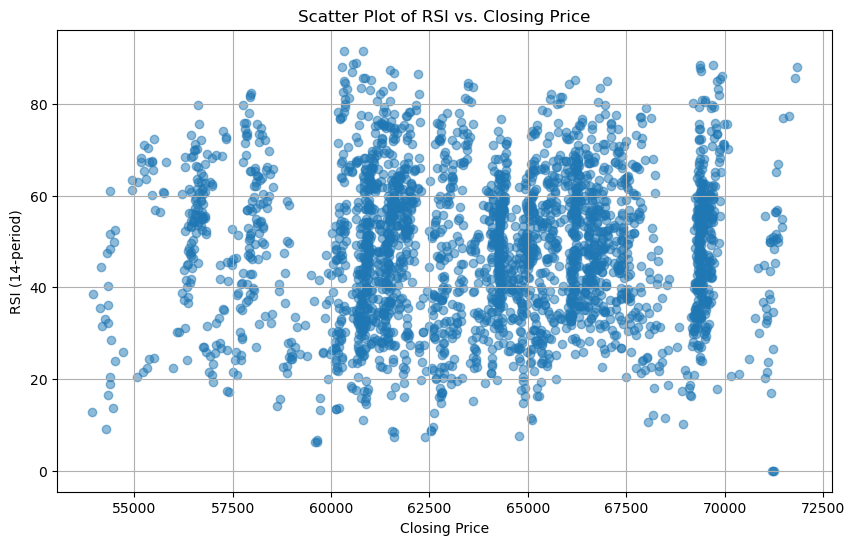

In [162]:
plt.figure(figsize=(10, 6))
plt.scatter(btc['Close'],btc['RSI_14'], alpha=0.5)
plt.title('Scatter Plot of RSI vs. Closing Price')
plt.ylabel('RSI (14-period)')
plt.xlabel('Closing Price')
plt.grid(True)
plt.show()

In [158]:
# Calculate the differences in the closing prices
delta = eth['Close'].diff()

# Separate the positive and negative differences
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# Calculate the rolling average of gains and losses
window_length = 14

avg_gain = gain.rolling(window=window_length, min_periods=1).mean()
avg_loss = loss.rolling(window=window_length, min_periods=1).mean()

# Calculate the Relative Strength (RS)
rs = avg_gain / avg_loss

# Calculate the RSI
eth['RSI_14'] = 100 - (100 / (1 + rs))

# Drop NaN values generated from RSI calculations
eth.dropna(inplace=True)
eth.reset_index(drop=True, inplace=True)
# View the modified DataFrame
eth.head()


,Datetime,Open,High,Low,Close,Adj Close,Volume,RSI_14
0,2024-06-07 06:15:00,3815.091064,3815.896484,3814.499512,3815.435059,3815.435059,0,0.000000
1,2024-06-07 06:30:00,3815.315674,3816.017090,3813.715576,3814.017090,3814.017090,0,0.000000
2,2024-06-07 06:45:00,3814.311279,3816.002686,3813.759277,3815.055664,3815.055664,0,38.655157
3,2024-06-07 07:00:00,3815.626465,3816.831543,3814.105225,3816.831543,3816.831543,6586368,63.066907
4,2024-06-07 07:15:00,3817.300049,3823.018555,3817.300049,3818.733887,3818.733887,32926720,74.105328


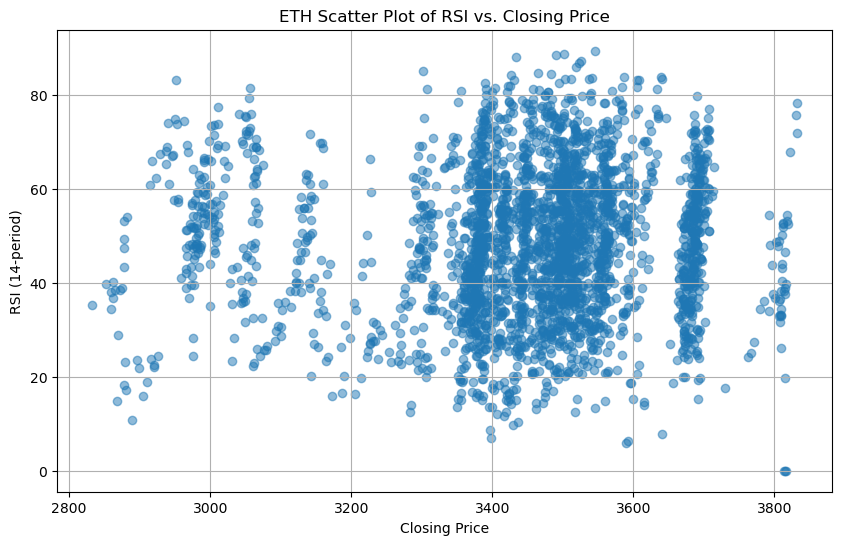

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(eth['Close'],eth['RSI_14'], alpha=0.5)
plt.title('ETH Scatter Plot of RSI vs. Closing Price')
plt.ylabel('RSI (14-period)')
plt.xlabel('Closing Price')
plt.grid(True)
plt.show()

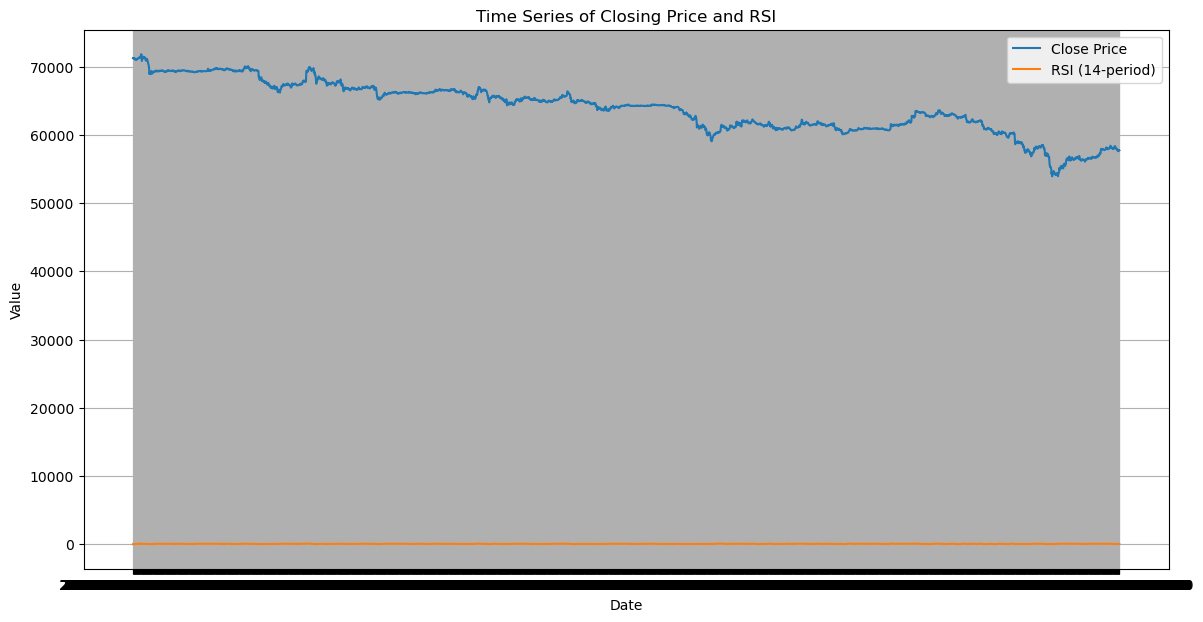

In [75]:
plt.figure(figsize=(14, 7))
plt.plot(btc['Datetime'], btc['Close'], label='Close Price')
plt.plot(btc['Datetime'], btc['RSI_14'], label='RSI (14-period)')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series of Closing Price and RSI')
plt.grid(True)
plt.show()


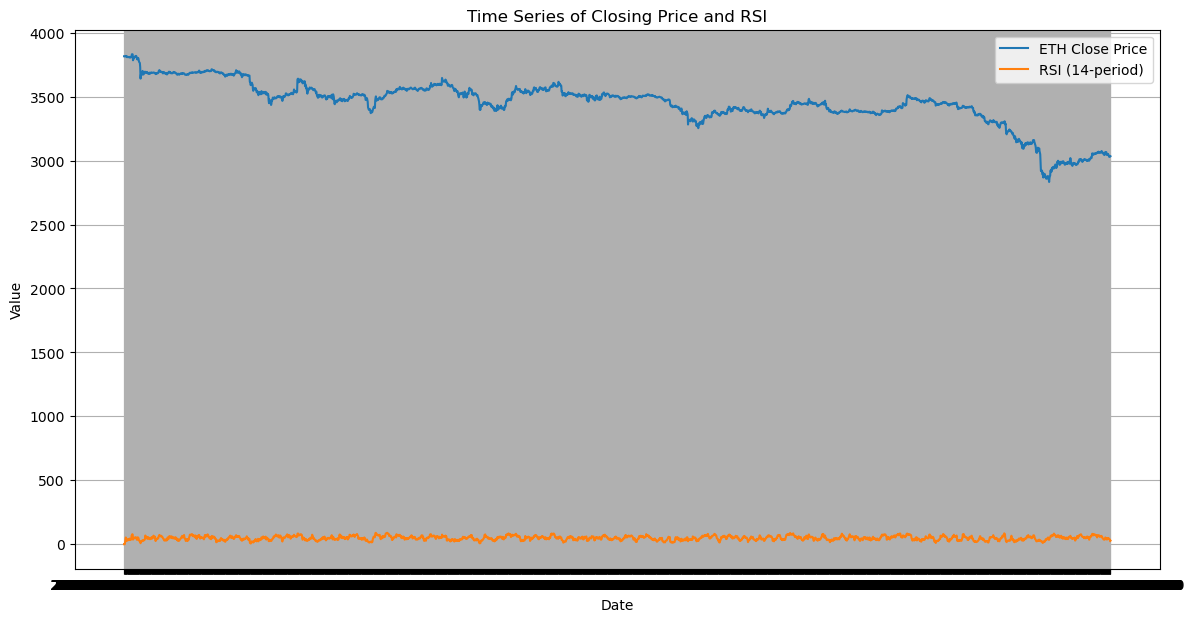

In [101]:
plt.figure(figsize=(14, 7))
plt.plot(eth['Datetime'], eth['Close'], label='ETH Close Price')
plt.plot(eth['Datetime'], eth['RSI_14'], label='RSI (14-period)')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series of Closing Price and RSI')
plt.grid(True)
plt.show()
